# I. Zarys matematyczny

### Regresja parametryczna i nieparametryczna (prezentacja problemu)
Analiza regresji jest techniką statystyczną pozwalająca opisywać związki zachodzące pomiędzy zmiennymi objaśniającymi a objaśnianymi.

Cechą wspólną różnych rodzajów regresji parametrycznej jest to, że musimy znać lub założyć na wstępie jakąś matematyczną zależność wiążącą zmienne wejściowe i wyjściowe. 

Zadanie znalezienia wspomnianej postaci matematycznej nie zawsze jest łatwe do wykonania, a czasami wręcz niewykonalne. W takich sytuacjach warto rozważyć użycie jednej z metod nieparametrycznych, która nie wymaga w żadnym miejscu przyjmowania założeń co do postaci funkcji wiążącej dane wejściowe i wyjściowe.

Często jest również tak, że nawet jeśli użycie metod parametrycznych jest uzasadnione, metody nieparametryczne po prostu łatwiej jest zastosować, gdyż nie trzeba brać pod uwagę specyficznych założeń, dotyczących głównie rozkładu populacji.

Przykładem takiej metody nieparametrycznej jest regresja jądrowa.

#### Regresja jądrowa
Załóżmy że mamy dane dwie jednowymiarowe zmienne losowe X,Y. Uzyskana z nich próba losowa długości n ma postać: 

$$(x_{1}, 
y_{1}), ..., (x_{n}, y_{n})$$

Poszukujemy funkcji, która najlepiej charakteryzowałaby ew. zależność między zmiennymi losowymi X oraz Y. Jej
estymator $\hat m(x)$ wyznacza się tak, aby zminimalizować wyrażenie
$$\sum_{i=1}^{n} [y_{i} - m(x_{i})]^2,$$

gdzie $m(x) = E(Y|X=x)$.

<!-- Funkcja m(x) opisuje warunkową wartość oczekiwaną zmiennej losowej Y pod warunkiem, że zmienna X przyjęła zadaną wartość x, czyli -->

<!-- W odróżnieniu od metod estymacji parametrycznej, estymator $\hat m(x)$ nie ma postaci funkcji analitycznej a jest po prostu pewną nieznaną funkcją. -->

Załóżmy, iż chcemy wyznaczyć wartość $\hat m(x)$ biorąc pod uwagę punkty z jego otoczenia $D_{x}=[x-b, x+b], b>0.$ Wówczas $\hat m(x)$ można estymować następującym wyrażeniem: 

$$\hat m(x) = \frac{\sum_{x_{i}D_{x}}y_{i}}{|x_{i} \in D_{x}|} $$

gdzie $|x_{i} \in D_{x}|$ jest liczbą elementów wewnątrz $D_{x}$.

Inaczej $\hat m(x_{t})$ można zapisać w postaci: 

$$\hat m(x_{t}) = \frac{\sum_{i=1}^{n} w_{ix}y_{i}}{\sum_{i=1}^{n} w_{ix}} $$

gdzie $w_{ix} =$ 0 lub 1 zwane jest wagą.

Powyższe równanie jest po prostu średnią ważoną. Dane, którym przypisano większe wagi mają większy udział w określeniu średniej ważonej niż dane, którym przypisano mniejsze wagi.

W praktyce wagi $w_{ix}$ zastępowane są przez funkcją o postaci:

$$w_{ix} = \frac{1}{h}K (\frac{x - x_{i}}{h}) = K_h(x-x_{i}),$$

gdzie $K(x)$ jest jądrem estymatora, natomiast $h$ jest pewnym ustalonym, dodatnim współczynnikiem wygładzenia (ramką, otoczeniem).

Po podstawieniupotrzymujemy podstawową postać estymatora regresji zwanego estymatorem Nadaraya-Watsona


$$\hat m(x_{t}) = \frac{\sum_{i=1}^{n} K (\frac{x - x_{i}}{h})y_{i}}{\sum_{i=1}^{n} K (\frac{x - x_{i}}{h})} = \sum_{i=1}^{n} w_{i}y_{i}$$

Ponadto funkcja jądrowa musi spełniać pewne właściwości:
<!-- funkcja musi być symetryczna -->
1. $K(x) = K(-x)$

<!-- pole pod wykresem funkcji jądrowej musi być równe 1 -->
2. $\int_{-\infty}^{+\infty}K(x)dx = 1.$

Jądro estymatora $K(x)$ najczęściej przyjmuje postać funkcji gaussowskiej:

$$K(x) = \frac{1}{\sqrt{2\pi}} exp (-\frac{x^2}{2})$$


Innymi możliwościami są, na przykład, jądro jednostajne postaci:

$$K(x) = \frac{1}{2}| _{|x| \leq1}, $$

czy jądro Epanechnikowa postaci:

$$K(x) = \frac{3}{4}(1-x^2)| _{|x| \leq1}.$$

<!-- 
import matplotlib.pyplot as plt
import numpy as np

def gaussian(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

def epanechnikov(x):
    return 0.75 * (1 - x**2)

def uniform(x):
    return 0*x+1/2

x_values = np.linspace(-1, 1, 120)
plt.plot(x_values, gaussian(x_values), label='Gaussian Kernel')
plt.plot(x_values, epanechnikov(x_values), label='Epanechnikov Kernel')
plt.plot(x_values, uniform(x_values), label='Uniform Kernel')
plt.legend()
plt.show() 
-->

![alt text](kernels.png "Kernels")

Bardzo istotne znaczenie dla kształtu linii regresji ma właściwy dobór współczynnika wygładzania $h$. Ma to dużo większe znaczenia niż wybór samego jądra. Zdefiniowanie zbyt szerokiego okna prowadzi do nadmiernego wygładzenia, natomiast okno zbyt wąskie będzie skutkowała zbyt małym wygładzeniem.

# II. Implementacja

In [87]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt

In [88]:
# from scipy.stats import multivariate_normal

'''Class for Gaussian Kernel Regression'''
class GKR:
    def __init__(self, x, y, b, type='gaussian'):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = b
        self.type = type

    '''Implement the Gaussian Kernel'''
    def gaussian(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)

    
    '''Implement the epanechnikow Kernel'''
    def epanechnikow(self, z):
        if math.fabs(z)<=1:
            return (3/4*(1-(z**2)))
        else:
            return 0

    '''Implement the uniform Kernel'''
    def uniform(self, z):
        if math.fabs(z)<=1:
            return 0.5
        else:
            return 0

    '''Calculate weights and return prediction'''
    def predict(self, X):
        if self.type == 'gaussian':
            kernels = np.array([self.gaussian((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        elif self.type == 'epanechnikow':
            kernels = np.array([self.epanechnikow((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        else:
            kernels = np.array([self.uniform((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        weights = np.array([len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels])
        return np.dot(weights.T, self.y)/len(self.x)

# III. Regresja jądrowa na sztucznych danych.

In [89]:
x_real = np.arange(-10, 10, 0.1)
y_real = [x_*math.sin(x_) for x_ in x_real]

In [90]:
rng = np.random.default_rng()
x_synth = [x + random.randint(-100, 100)/100 for x in np.arange(-10, 10, 0.25)]
y_synth = [x_*math.sin(x_) + random.randint(-100, 100)/100 for x_ in x_synth]

In [91]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

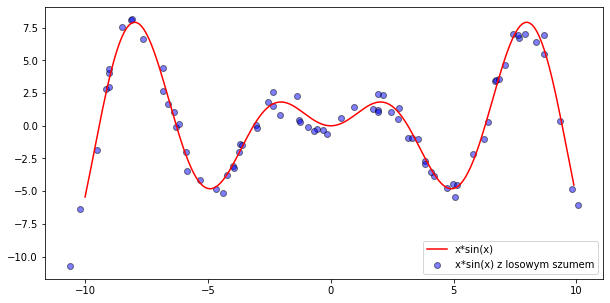

In [92]:
plt.plot(x_real, y_real, color='red', label='x*sin(x)') 
plt.scatter(x_synth, y_synth, color='blue', edgecolor='k', alpha=0.5, label='x*sin(x) z losowym szumem') 
plt.legend()

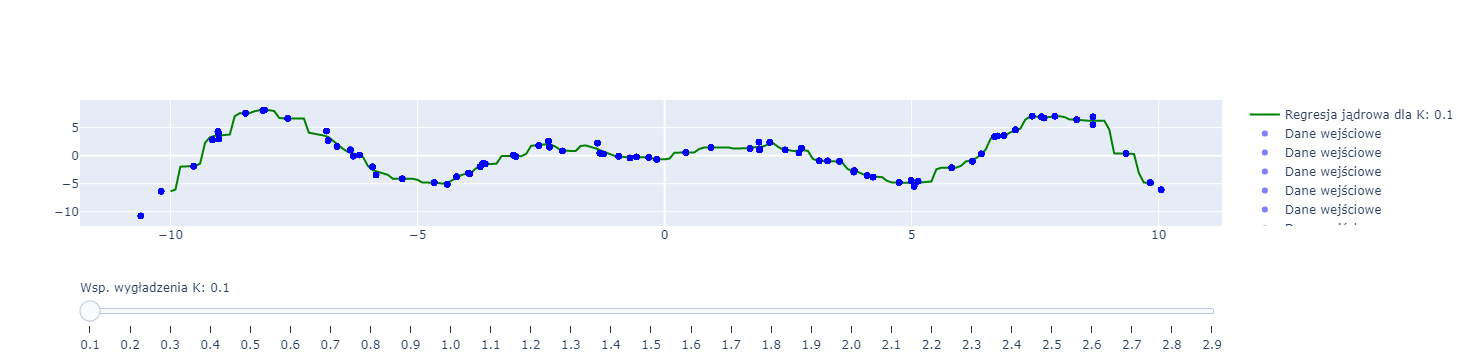

In [108]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces
for step in np.arange(0.1, 3, 0.1):
    gkr = GKR(x_synth, y_synth, step )

    x_p=[]
    y_p = []
    for x in x_real:
        x_p.append(x)
        y_p.append(gkr.predict(x))

    trace1 = go.Scatter(
            visible=False,
            line=dict(color="green", width=2),
            name="Regresja jądrowa dla K: " + str(round(step, 1)),
            x=x_p,
            y=y_p)

    fig.add_trace(trace1)

for step in np.arange(0.1, 3, 0.1):
    trace2 = go.Scatter(
            name="Dane wejściowe",
            mode='markers',
            marker=dict(color='rgba(0, 0, 255, 0.5)'),
            x=x_synth,
            y=y_synth)

    fig.add_trace(trace2)

# Make 0th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(np.arange(0.1, 3, 0.1))):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Wykres dla regresji jądrowej z współczynnikiem wygładzenia równym: " + str((i+1)/10)}],
    )
    step["args"][0]["visible"][i] = True
    step["args"][0]["visible"][i+len(np.arange(0.1, 3, 0.1))] = True
    steps.append(step)

sliders = [dict(
    active=0,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(sliders=sliders)

# Edit slider labels
fig['layout']['sliders'][0]['currentvalue']['prefix']='Wsp. wygładzenia K: '
for i, j in enumerate(np.arange(0.1, 3, 0.1), start = 0):
    fig['layout']['sliders'][0]['steps'][i]['label']=round(j, 1)

fig.show()

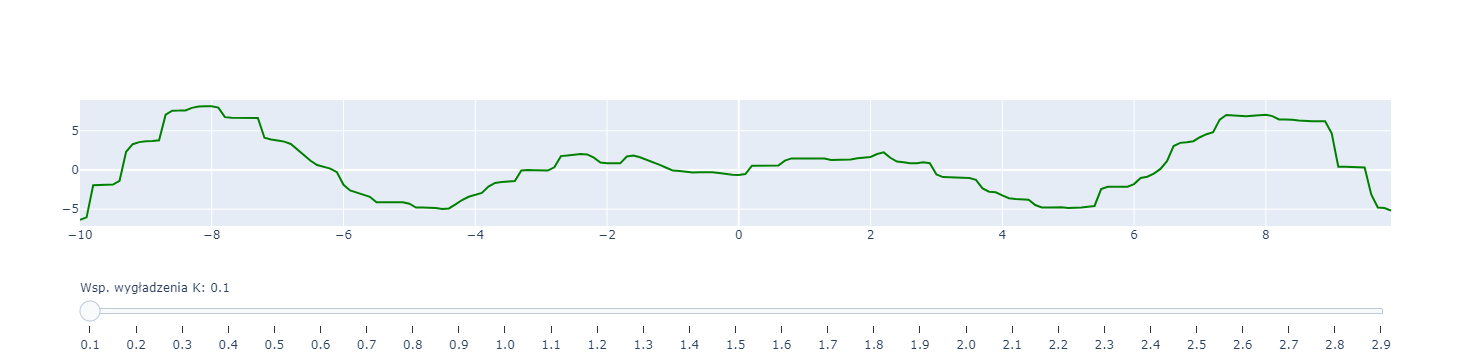

In [94]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces
for step in np.arange(0.1, 3, 0.1):
    gkr = GKR(x_synth, y_synth, step)

    x_p=[]
    y_p = []
    for x in x_real:
        x_p.append(x)
        y_p.append(gkr.predict(x))

    trace1 = go.Scatter(
            visible=False,
            line=dict(color="green", width=2),
            name="Wykres dla wartości K: " + str(round(step, 1)),
            x=x_p,
            y=y_p)

    fig.add_trace(trace1)

for step in np.arange(0.1, 3, 0.1):
    trace3 = go.Scatter(
            visible=False,
            line=dict(color="red", width=2),
            name="y=x*sin(x)",
            x=x_real,
            y=y_real)

    fig.add_trace(trace3)

# Make 0th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(np.arange(0.1, 3, 0.1))):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Wykres dla regresji jądrowej z współczynnikiem wygładzenia równym: " + str((i+1)/10)}],
    )
    step["args"][0]["visible"][i] = True
    step["args"][0]["visible"][i+len(np.arange(0.1, 3, 0.1))] = True
    steps.append(step)

sliders = [dict(
    active=0,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(sliders=sliders)

# Edit slider labels
fig['layout']['sliders'][0]['currentvalue']['prefix']='Wsp. wygładzenia K: '
for i, j in enumerate(np.arange(0.1, 3, 0.1), start = 0):
    fig['layout']['sliders'][0]['steps'][i]['label']=round(j, 1)

fig.show()

# IV. Regresja jądrowa na realnych danych.

Happiness and Alcohol dataset - Zbiór danych zawierający informacje o relacjach między spożyciem alkoholu, GDP i współczynnikiem szczęscia.<br>
HDI - Miernik opisujący stopień rozwoju społeczno-ekonomicznego poszczególnych krajów<br>
GDP - Miernik opisujący zagregowaną wartość dóbr i usług finalnych wytworzonych przez narodowe i zagraniczne czynniki produkcji na terenie danego kraju w określonej jednostce czasu.<br>
Szczęście - Subiektywna ocena szczęscia mieszkańców danego kraju.

In [95]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [96]:
data = pd.read_csv('data2/HappinessAlcoholConsumption.csv')

data = data[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita', 'HappinessScore']]
data['GDP_PerCapita'] = data['GDP_PerCapita'].apply(lambda x: x*1000)
data = data[data['GDP_PerCapita'] < 200000]

In [97]:
matplotlib.rcParams['figure.figsize'] = [20, 5]

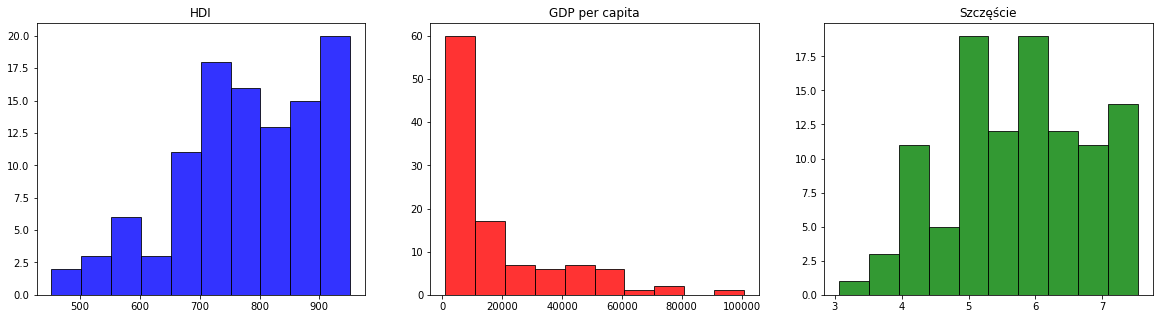

In [98]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(data['HDI'], color='blue', edgecolor='k', alpha=0.8)
axs[0].set_title('HDI')
axs[0].grid(False)

axs[1].hist(data['GDP_PerCapita'], color='red', edgecolor='k', alpha=0.8)
axs[1].set_title('GDP per capita')
axs[1].grid(False)

axs[2].hist(data['HappinessScore'], color='green', edgecolor='k', alpha=0.8)
axs[2].set_title('Szczęście')
axs[2].grid(False)

[Text(0.5, 0, 'L / rok')]

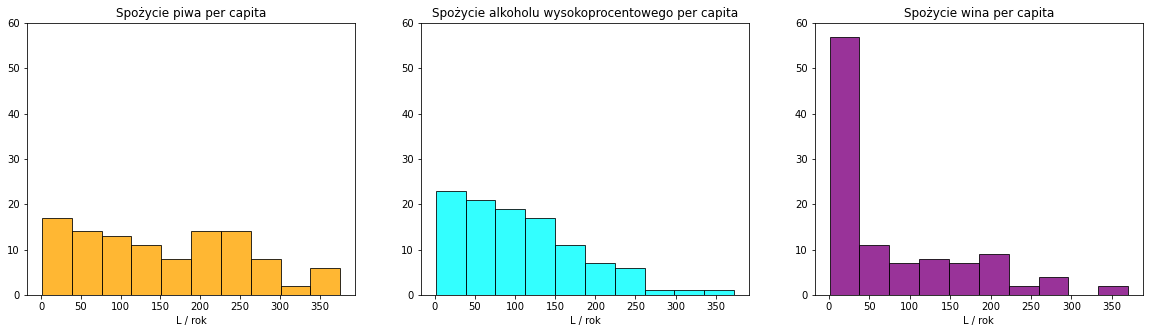

In [99]:
fig, axs = plt.subplots(1, 3)

axs[0].hist(data['Beer_PerCapita'], color='orange', edgecolor='k', alpha=0.8)
axs[0].set_ylim([0, 60])
axs[0].grid(False)
axs[0].set_title('Spożycie piwa per capita')

axs[1].hist(data['Spirit_PerCapita'], color='cyan', edgecolor='k', alpha=0.8)
axs[1].set_ylim([0, 60])
axs[1].grid(False)
axs[1].set_title('Spożycie alkoholu wysokoprocentowego per capita')

axs[2].hist(data['Wine_PerCapita'], color='purple', edgecolor='k', alpha=0.8)
axs[2].set_ylim([0, 60])
axs[2].grid(False)
axs[2].set_title('Spożycie wina per capita')

axs.flat[0].set(xlabel='L / rok')
axs.flat[1].set(xlabel='L / rok')
axs.flat[2].set(xlabel='L / rok')

In [100]:
matplotlib.rcParams['figure.figsize'] = [25, 5]

[Text(0.5, 0, 'Spożycie wina per capita')]

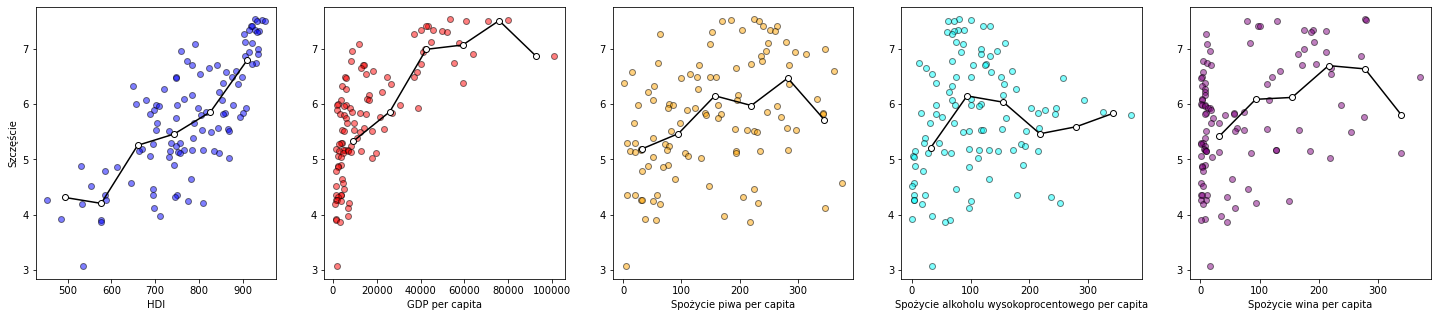

In [101]:
fig, axs = plt.subplots(1, 5)

axs[0].scatter(data['HDI'], data['HappinessScore'], c='blue', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['HDI'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[0].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[1].scatter(data['GDP_PerCapita'], data['HappinessScore'], c='red', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['GDP_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[1].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[2].scatter(data['Beer_PerCapita'], data['HappinessScore'], c='orange', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['Beer_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[2].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[3].scatter(data['Spirit_PerCapita'], data['HappinessScore'], c='cyan', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['Spirit_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[3].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs[4].scatter(data['Wine_PerCapita'], data['HappinessScore'], c='purple', edgecolor='k', alpha=0.5)
bin_means, bin_edges, binnumber = stats.binned_statistic(data['Wine_PerCapita'], data['HappinessScore'], statistic='mean', bins=6)
bin_centers = bin_edges[1:] - (bin_edges[1] - bin_edges[0])/2
axs[4].plot(bin_centers, bin_means, color='k', marker="o", markerfacecolor="white")

axs.flat[0].set(ylabel="Szczęście", xlabel='HDI')
axs.flat[1].set(xlabel='GDP per capita')
axs.flat[2].set(xlabel='Spożycie piwa per capita')
axs.flat[3].set(xlabel='Spożycie alkoholu wysokoprocentowego per capita')
axs.flat[4].set(xlabel='Spożycie wina per capita')

# V. Porównanie z innymi metodami regresji.

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [103]:
matplotlib.rcParams['figure.figsize'] = [25, 20]

HDI - Regresja jądrowa RMSE: 0.6558537697266882
HDI - Regresja liniowa RMSE: 0.6777996816058581
HDI - Regresja wielomianowa 2 st. RMSE: 0.6661589803728959
HDI - Regresja wielomianowa 5 st. RMSE: 0.6297973643880265

GDP_PerCapita - Regresja jądrowa RMSE: 0.7095771571364817
GDP_PerCapita - Regresja liniowa RMSE: 0.7248587978890738
GDP_PerCapita - Regresja wielomianowa 2 st. RMSE: 0.6660930148637814
GDP_PerCapita - Regresja wielomianowa 5 st. RMSE: 0.7365550542824721

Beer_PerCapita - Regresja jądrowa RMSE: 0.9310164107647863
Beer_PerCapita - Regresja liniowa RMSE: 0.958559415052026
Beer_PerCapita - Regresja wielomianowa 2 st. RMSE: 0.9307842407103638
Beer_PerCapita - Regresja wielomianowa 5 st. RMSE: 0.9178820960259534

Spirit_PerCapita - Regresja jądrowa RMSE: 0.9566745399292798
Spirit_PerCapita - Regresja liniowa RMSE: 1.015447673878436
Spirit_PerCapita - Regresja wielomianowa 2 st. RMSE: 0.9702516434198333
Spirit_PerCapita - Regresja wielomianowa 5 st. RMSE: 0.9071550548404802

Wine_P

[Text(0, 0.5, 'Spoż. wina na os. / Szczęscie')]

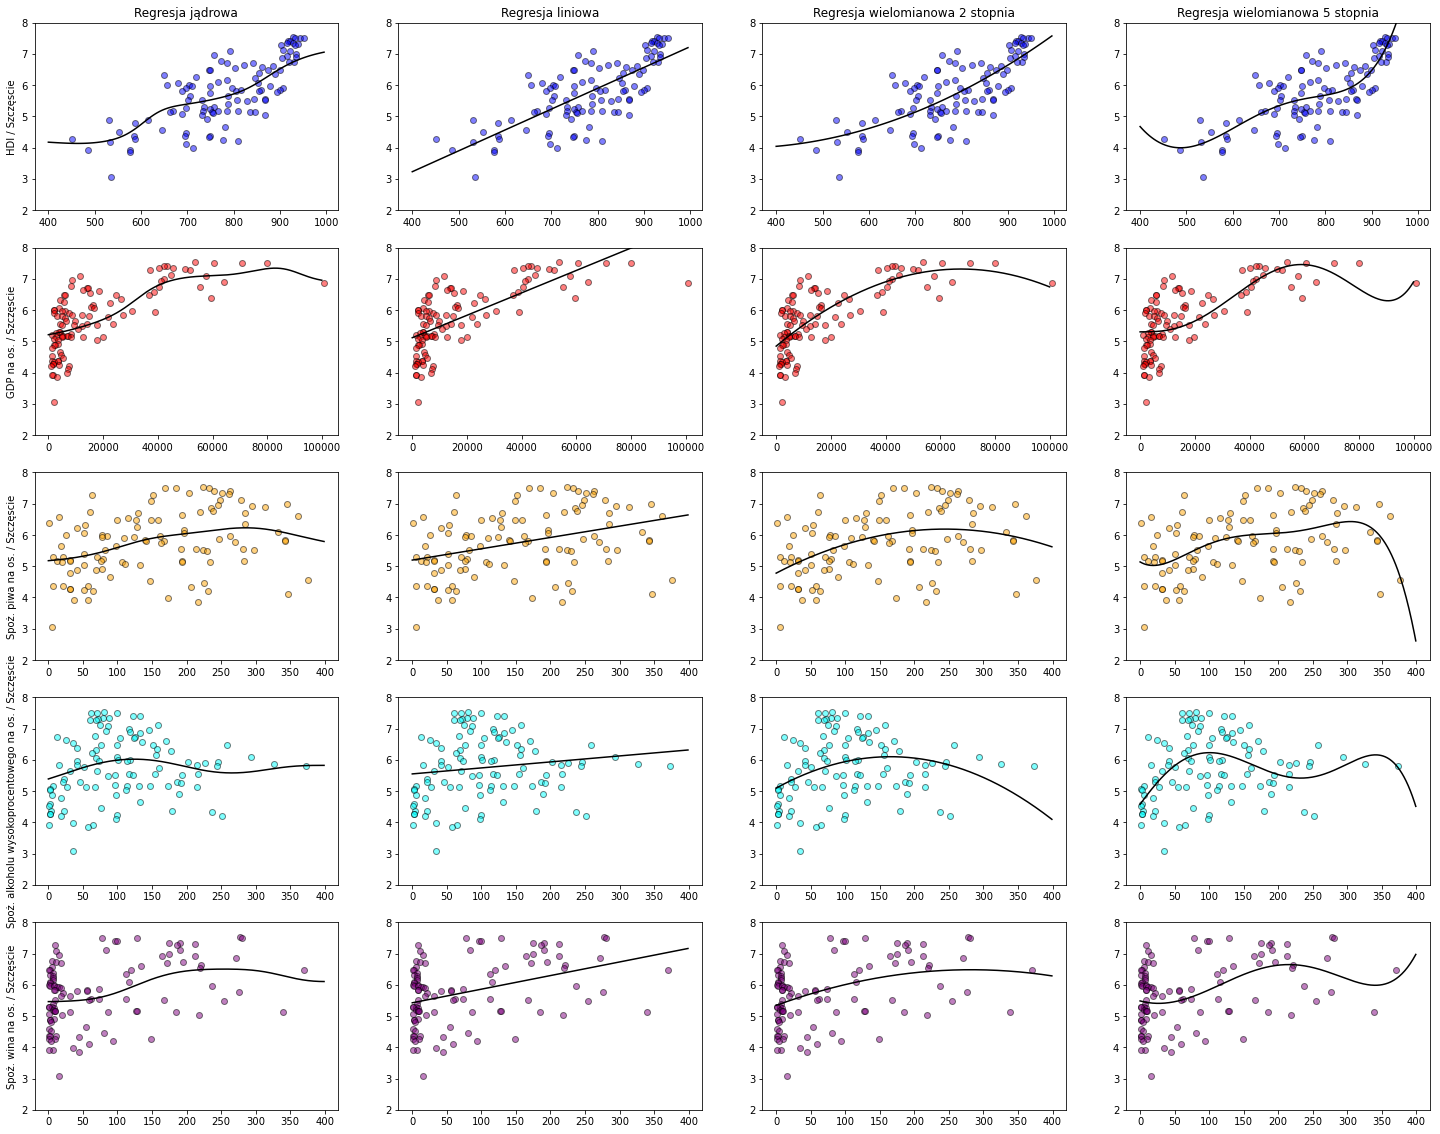

In [104]:
# Tu Porównanie z innymi metodami regresji (wykres + score)
features = [('HDI', 'blue', np.arange(400, 1000, 5)), ('GDP_PerCapita', 'red', np.arange(0, 100000, 100)), ('Beer_PerCapita', 'orange', np.arange(0, 400, 1)), ('Spirit_PerCapita', 'cyan', np.arange(0, 400, 1)), ('Wine_PerCapita', 'purple', np.arange(0, 400, 1))]

fig, axs = plt.subplots(5, 4)

y = data['HappinessScore'].values

for i, (feature, color, xs) in enumerate(features):
    X = data[feature].values
    X = X.reshape(-1, 1)
    X_ = xs
    # Kernel regression
    kernel_reg = GKR(X,y,50)
    if feature == 'GDP_PerCapita':
        kernel_reg = GKR(X,y,10_000)
    kernel_reg_x_predicted =[]
    kernel_reg_y_predicted =[]
    for x in X_:
        kernel_reg_x_predicted.append(x)
        kernel_reg_y_predicted.append(kernel_reg.predict(x))
    axs[i, 0].scatter(data[feature], data['HappinessScore'], color=color, edgecolor='k', alpha=0.5)
    axs[i, 0].plot(kernel_reg_x_predicted, kernel_reg_y_predicted, color='k')
    axs[i, 0].set_ylim([2, 8])
    poly_reg_y = [kernel_reg.predict(x) for x in X]
    print(f'{feature} - Regresja jądrowa RMSE:', np.sqrt(metrics.mean_squared_error(y, poly_reg_y)))

    # Linear regression
    # X_ = xs
    poly1 = PolynomialFeatures(degree=1, include_bias=False)
    poly1_features = poly1.fit_transform(X.reshape(-1, 1))
    poly1_X = poly1.fit_transform(X_.reshape(-1, 1))
    poly1_reg_model = LinearRegression()
    poly1_reg_model.fit(poly1_features, y)
    poly1_y_predicted = poly1_reg_model.predict(poly1_X)
    axs[i, 1].scatter(data[feature], data['HappinessScore'], color=color, edgecolor='k', alpha=0.5)
    axs[i, 1].plot(X_, poly1_y_predicted, color='k')
    axs[i, 1].set_ylim([2, 8])
    print(f'{feature} - Regresja liniowa RMSE:', np.sqrt(metrics.mean_squared_error(y, poly1_reg_model.predict(X))))

    # Polynominal regression (2)
    poly2 = PolynomialFeatures(degree=2, include_bias=False)
    poly2_features = poly2.fit_transform(X.reshape(-1, 1))
    poly2_X = poly2.fit_transform(X_.reshape(-1, 1))
    poly2_reg_model = LinearRegression()
    poly2_reg_model.fit(poly2_features, y)
    poly2_y_predicted = poly2_reg_model.predict(poly2_X)
    axs[i, 2].scatter(data[feature], data['HappinessScore'], color=color, edgecolor='k', alpha=0.5)
    axs[i, 2].plot(X_, poly2_y_predicted, color='k')
    axs[i, 2].set_ylim([2, 8])
    print(f'{feature} - Regresja wielomianowa 2 st. RMSE:', np.sqrt(metrics.mean_squared_error(y, poly2_reg_model.predict(poly2.fit_transform(X.reshape(-1, 1))))))

    # Polynominal regression (5)
    poly3 = PolynomialFeatures(degree=5, include_bias=False)
    poly3_features = poly3.fit_transform(X.reshape(-1, 1))
    poly3_X = poly3.fit_transform(X_.reshape(-1, 1))
    poly3_reg_model = LinearRegression()
    poly3_reg_model.fit(poly3_features, y)
    poly3_y_predicted = poly3_reg_model.predict(poly3_X)
    axs[i, 3].scatter(data[feature], data['HappinessScore'], color=color, edgecolor='k', alpha=0.5)
    axs[i, 3].plot(X_, poly3_y_predicted, color='k')
    axs[i, 3].set_ylim([2, 8])
    print(f'{feature} - Regresja wielomianowa 5 st. RMSE:', np.sqrt(metrics.mean_squared_error(y, poly3_reg_model.predict(poly3.fit_transform(X.reshape(-1, 1))))))
    print('')

axs.flat[0].set(title="Regresja jądrowa")
axs.flat[1].set(title="Regresja liniowa")
axs.flat[2].set(title="Regresja wielomianowa 2 stopnia")
axs.flat[3].set(title="Regresja wielomianowa 5 stopnia")
axs.flat[0].set(ylabel="HDI / Szczęscie")
axs.flat[4].set(ylabel="GDP na os. / Szczęscie")
axs.flat[8].set(ylabel="Spoż. piwa na os. / Szczęscie")
axs.flat[12].set(ylabel="Spoż. alkoholu wysokoprocentowego na os. / Szczęscie")
axs.flat[16].set(ylabel="Spoż. wina na os. / Szczęscie")